In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Train.csv')
# df.head()

In [2]:
# df.info()

In [3]:
# df.describe()

In [4]:
skewness = df['pm2_5'].skew()
print(f"Skewness: {skewness}")

Skewness: 7.383403684525106


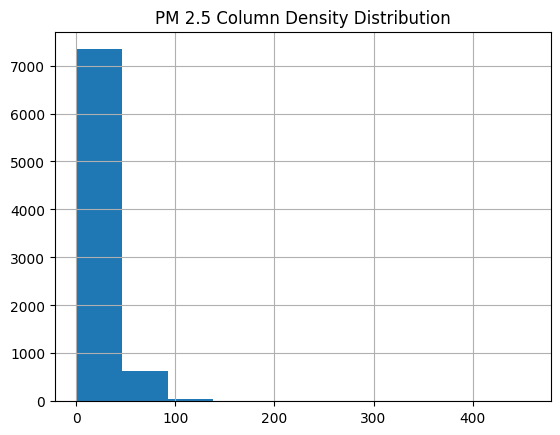

In [5]:
df['pm2_5'].hist() # Visualize skewness with a histogram
# df['pm2_5'].hist() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html
# This is simply a shortcut to: matplotlib.pyplot.hist()
# plt.hist()
plt.title('PM 2.5 Column Density Distribution')
plt.show()

### Better Visualiztions With Seaborn

Seaborn shows us more detailed plots out of the box

https://seaborn.pydata.org/generated/seaborn.histplot.html

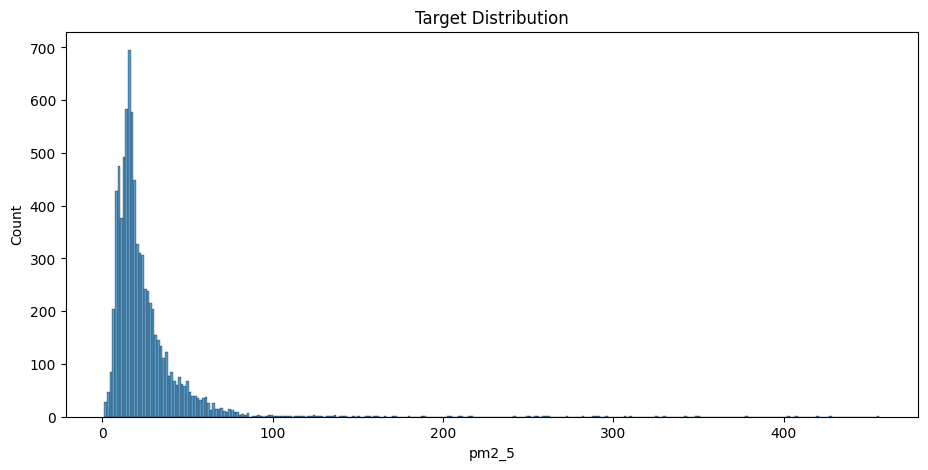

In [6]:
plt.figure(figsize = (11, 5))
sns.histplot(df["pm2_5"])
plt.title('Target Distribution')
plt.show()

## Transforming Data in Python

### Missing Values
Finding Missing Values using df.isnull
https://pandas.pydata.org/docs/reference/api/pandas.isnull.html

In [7]:
# df["pm2_5"].isnull() # Returns a seires of True/False
# The code above is an alias for:
# pd.isna(df["pm2_5"])

df["pm2_5"].isnull().sum() # No missing values for this column -> Great

df["sulphurdioxide_so2_column_number_density"].isnull().sum() # Several missing values for this column

# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
# https://numpy.org/doc/2.1/reference/generated/numpy.sum.html

np.int64(4912)

### Handling missing values by zero filling

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [8]:
df['sulphurdioxide_so2_column_number_density'] = df['sulphurdioxide_so2_column_number_density'].fillna(0)
df["sulphurdioxide_so2_column_number_density"].isnull().sum() # No missing values anymore

np.int64(0)

### Square Root Transformation

https://numpy.org/doc/2.1/reference/generated/numpy.sqrt.html

2.529693698583593


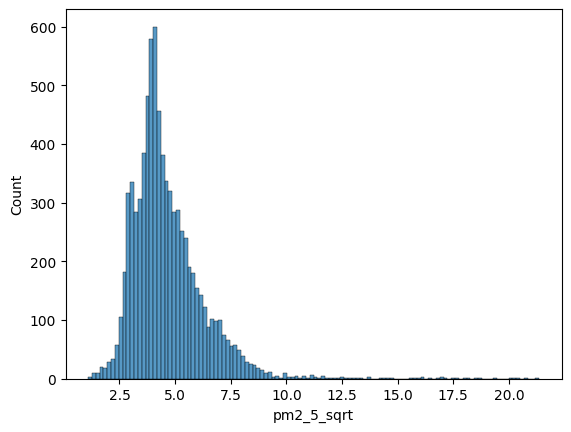

In [9]:
import numpy as np

df['pm2_5_sqrt'] = np.sqrt(df['pm2_5'])

# Recalculate skew
sqrt_skewness = df['pm2_5_sqrt'].skew()
print(sqrt_skewness)
sns.histplot(df["pm2_5_sqrt"])
plt.show()

### Log Transformation

Log of 0 is not defined, so we use log1p in Pandas, which returns log(1 + x)

https://numpy.org/doc/2.1/reference/generated/numpy.log1p.html

https://numpy.org/doc/2.1/reference/generated/numpy.log.html

0.49138261989345633


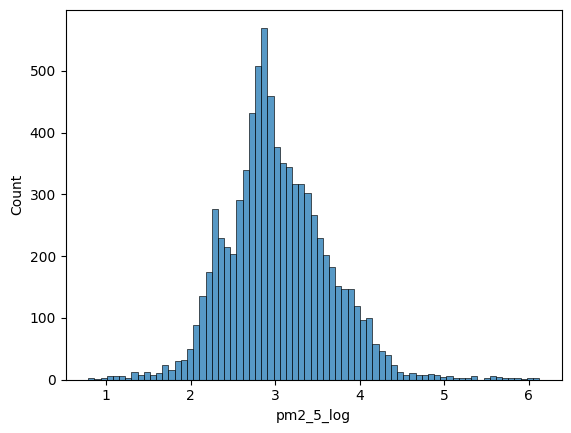

In [10]:
df['pm2_5_log'] = np.log1p(df['pm2_5']) # np.log(0) # Log is problematic
log_skewness = df['pm2_5_log'].skew()
print(log_skewness)
sns.histplot(df["pm2_5_log"])
plt.show()